In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, CSVLogger, ModelCheckpoint, EarlyStopping

In [3]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

In [4]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [5]:
y = train['label']
x = train.drop(labels=['label'], axis=1)

In [6]:
x = x.values.reshape(-1, 28, 28, 1)
# y = to_categorical(y, 10) # num_classes는 class갯수인가보다
test = test.values.reshape(-1, 28, 28, 1)

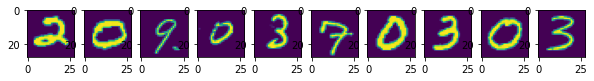

In [7]:
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(test[i])
plt.show()

In [8]:
train_input, test_input, train_target, test_target = train_test_split(x, y, test_size=0.4, shuffle=True)


In [9]:
print(train_input.shape)
print(test_input.shape)
print(train_target.shape)
print(test_target.shape)

(25200, 28, 28, 1)
(16800, 28, 28, 1)
(25200,)
(16800,)


In [10]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.1, shuffle=True)

In [11]:
print(train_target[:5])

3930     8
5946     8
25291    0
37240    1
15272    4
Name: label, dtype: int64


In [12]:
print(train_input.shape)

(22680, 28, 28, 1)


In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                        input_shape=(28, 28, 1), padding='same'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

2023-02-15 07:51:53.188161: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               3

In [15]:
model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy', 
              metrics='accuracy')


In [16]:
checkpoint_cb = ModelCheckpoint('best-cnn-model.h5',
                               save_best_only=True)
early_stopping_cb = EarlyStopping(patience=2,
                                 restore_best_weights=True)


In [17]:
print(train_target.shape)
print(train_input.shape)

(22680,)
(22680, 28, 28, 1)


In [ ]:
history = model.fit(train_input, train_target, 
                    epochs=20,
                   validation_data=(val_input, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

2023-02-15 07:51:53.713243: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
709/709 [==============================] - 17s 23ms/step - loss: 1.2739 - accuracy: 0.7042 - val_loss: 0.1404 - val_accuracy: 0.9563
Epoch 2/20
709/709 [==============================] - 18s 26ms/step - loss: 0.3042 - accuracy: 0.9149 - val_loss: 0.0953 - val_accuracy: 0.9687
Epoch 3/20
709/709 [==============================] - 17s 24ms/step - loss: 0.2199 - accuracy: 0.9396 - val_loss: 0.0849 - val_accuracy: 0.9750
Epoch 4/20
709/709 [==============================] - 17s 24ms/step - loss: 0.2128 - accuracy: 0.9438 - val_loss: 0.0984 - val_accuracy: 0.9726
Epoch 5/20
191/709 [=======>......................] - ETA: 11s - loss: 0.2106 - accuracy: 0.9476

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
model.evaluate(test_input, test_target)

In [ ]:
# print(test_input.shape)
# print(test_target.shape)
# print(train_input.shape)
# print(train_target.shape)
# print(val_input.shape)
# print(val_target.shape)
# y = to_categorical(test_target, 10)

In [ ]:
# import numpy as np
# predicted_classes = np.argmax(model.predict(test_input), axis=1)
# correct_indices = np.nonzero(predicted_classes == y)[0]
# incorrect_indices = np.nonzero(predicted_classes != y)[0]

In [ ]:
y_pred = model.predict(train_input) # 예측 값
y_predict = [np.argmax(y_pred[i]) for i in range(len(y_pred))]

In [ ]:
y_list = train_target.to_list()
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_input[i])
    plt.axis('off')
    plt.title('actual value : %d' %y_list[i]+ '\n predicted value is : %d ' % y_predict[i])

In [ ]:
df_test = np.array(df_test)
df_test = df_test.reshape(len(df_test),28,28,1)

result = model.predict(df_test)

predicted_val=[]
for i in range(len(result)):
    predicted_val.append(np.argmax(result[i]))

In [ ]:
submission = pd.DataFrame()
imgid=[]
for i in range(1, len(predicted_val)+1):
    imgid.append(i)
    
submission["Imageid"]=imgid
submission["Label"]=predicted_val

In [ ]:
submission.head()

In [ ]:
submission.to_csv('submission.csv',index=False)